In [74]:
from plotnine import *
import pandas as pd
import numpy as np

# load the experiment results
file_type = ["txt","mat","html","bmp"]
results = {}
for t in file_type:
    results.update({t:[]})
    for b in range(1,25):
        results[t].append({"sz":{},"te":{},"td":{}})
        file_name = f"./result/{b}_{t}.txt"
        with open(file_name) as f:
            lines = f.readlines()
        l = 0
        while l < len(lines):
            ds = int(lines[l])
            results[t][b-1]["sz"][ds] = int(lines[l+1])
            results[t][b-1]["te"][ds] = float(lines[l+2])
            results[t][b-1]["td"][ds] = float(lines[l+3])
            l = l + 5

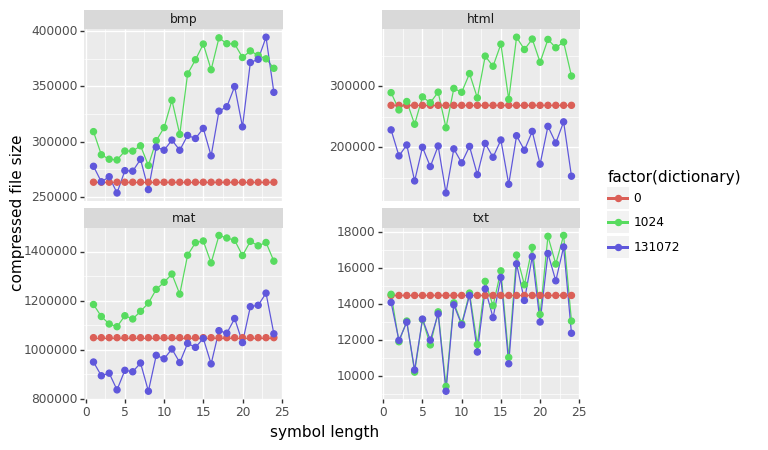

<ggplot: (192912234948)>

In [75]:
# symbol size : compression size
dictionary_arr = []
symbol_arr = []
size_arr = []
type_arr = []
for t in file_type:
    for b in range(1,25):
        for d in [0, 1024, 131072]: 
            dictionary_arr.append(d)
            symbol_arr.append(b)
            size_arr.append(results[t][b-1]["sz"][d])
            type_arr.append(t)

bit_df = pd.DataFrame({"dictionary":dictionary_arr,
    "symbol":symbol_arr,
    "size":size_arr,
    "type":type_arr})
# bit_df["type"] = pd.Categorical(bit_df["type"], categories=file_type)


(
    ggplot()
    + geom_line(bit_df, aes(x="symbol",y="size",group="factor(dictionary)",colour="factor(dictionary)"))
    + geom_point(bit_df, aes(x="symbol",y="size",group="factor(dictionary)",colour="factor(dictionary)"),size=2)
    + facet_wrap("type", scales = "free_y")
    + labs(x="symbol length",y="compressed file size")
    + theme(subplots_adjust={"wspace":0.5})
)

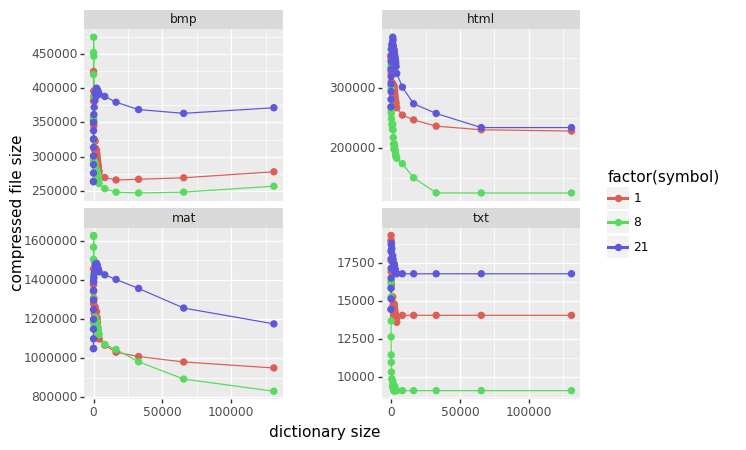

<ggplot: (192909921543)>

In [76]:
# dictionary size : compression size
dictionary_arr = []
symbol_arr = []
size_arr = []
type_arr = []
for t in file_type:
    for b in [1,8,21]:
        for d in results[t][int(b)-1]["sz"].keys():      
            dictionary_arr.append(d)
            symbol_arr.append(b)
            size_arr.append(results[t][int(b)-1]["sz"][d])
            type_arr.append(t)

dictionary_df = pd.DataFrame({"dictionary":dictionary_arr,
    "symbol":symbol_arr,
    "size":size_arr,
    "type":type_arr})

(
    ggplot()
    + geom_line(dictionary_df, aes(x="dictionary",y="size",group="factor(symbol)",colour="factor(symbol)"))
    + geom_point(dictionary_df, aes(x="dictionary",y="size",group="factor(symbol)",colour="factor(symbol)"),size=2)
    + facet_wrap("type", scales = "free_y")
    + labs(x="dictionary size",y="compressed file size")
    + theme(subplots_adjust={"wspace":0.5})
)

<ipython-input-111-7bab7de22320>:9: RuntimeWarning: divide by zero encountered in log2


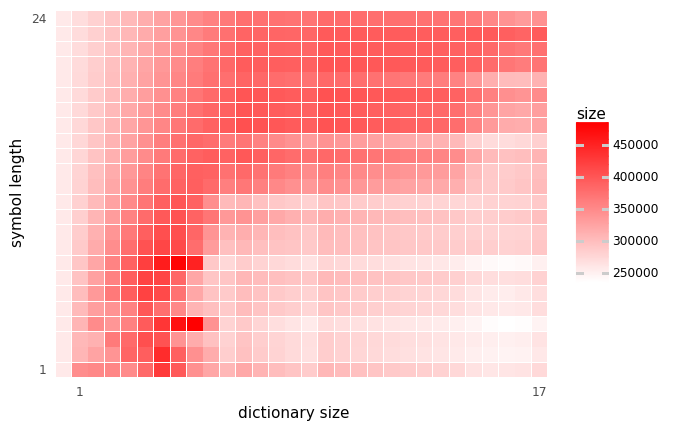

<ggplot: (192909077498)>

In [111]:
# txt file  
# dictionary size, symbol size : compression size 
dictionary_arr = []
symbol_arr = []
size_arr = []

for b in range(1,25):
    for d in results["txt"][int(b)-1]["sz"].keys():    
        dictionary_arr.append(np.log2(d))
        symbol_arr.append(b)
        size_arr.append(results[t][int(b)-1]["sz"][d])

txt_sz_df = pd.DataFrame({"dictionary":dictionary_arr,
    "symbol":symbol_arr,
    "size":size_arr})
         
(
    ggplot(txt_sz_df,aes("factor(dictionary)", "factor(symbol)", fill="size"))
    + geom_tile(aes(width=.95, height=.95))
    + labs(x="dictionary size",y="symbol length")
    + scale_fill_gradient(low="white", high="red") 
    + scale_x_discrete(breaks=[1,17])
    + scale_y_discrete(breaks=[1,24])
    + theme(axis_ticks=element_blank(),
        panel_background=element_rect(fill='white'))
)

<ipython-input-110-bb7fd48aa489>:9: RuntimeWarning: divide by zero encountered in log2


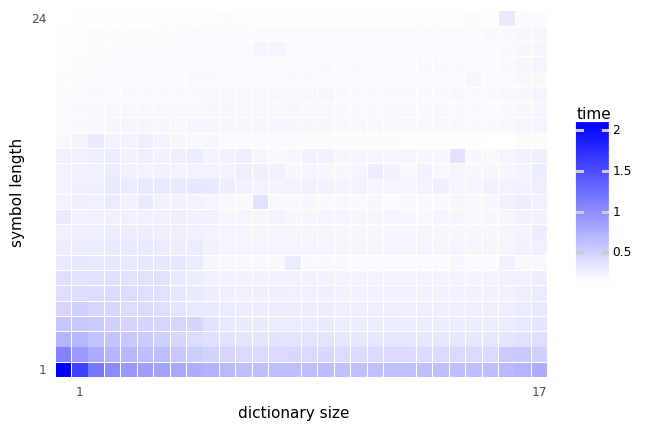

<ggplot: (192910103360)>

In [110]:
# txt file  
# dictionary size, symbol size : encoding time                        
dictionary_arr = []
symbol_arr = []
encoding_arr = []

for b in range(1,25):
    for d in results["txt"][int(b)-1]["te"].keys():    
        dictionary_arr.append(np.log2(d))
        symbol_arr.append(b)
        encoding_arr.append(results[t][int(b)-1]["te"][d])

txt_te_df = pd.DataFrame({"dictionary":dictionary_arr,
    "symbol":symbol_arr,
    "time":encoding_arr})
                
(
    ggplot(txt_te_df,aes("factor(dictionary)", "factor(symbol)", fill="time"))
    + geom_tile(aes(width=.95, height=.95))
    + labs(x="dictionary size",y="symbol length")
    + scale_fill_gradient(low="white", high="blue") 
    + scale_x_discrete(breaks=[1,17])
    + scale_y_discrete(breaks=[1,24])
    + theme(axis_ticks=element_blank(),
        panel_background=element_rect(fill='white'))
)

<ipython-input-109-3f9105b3687c>:9: RuntimeWarning: divide by zero encountered in log2


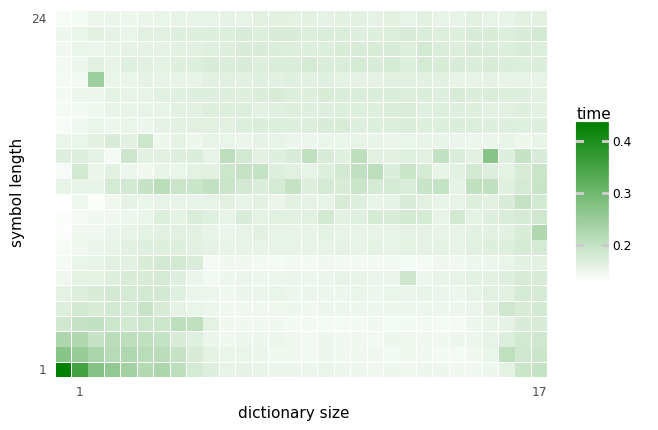

<ggplot: (192912525954)>

In [109]:
# txt file  
# dictionary size, symbol size : decoding time        
dictionary_arr = []
symbol_arr = []
decoding_arr = []

for b in range(1,25):
    for d in results["txt"][int(b)-1]["td"].keys():    
        dictionary_arr.append(np.log2(d))
        symbol_arr.append(b)
        decoding_arr.append(results[t][int(b)-1]["td"][d])

txt_td_df = pd.DataFrame({"dictionary":dictionary_arr,
    "symbol":symbol_arr,
    "time":decoding_arr})
         
(
    ggplot(txt_td_df,aes("factor(dictionary)", "factor(symbol)", fill="time"))
    + geom_tile(aes(width=.95, height=.95))
    + labs(x="dictionary size",y="symbol length")
    + scale_fill_gradient(low="white", high="green") 
    + scale_x_discrete(breaks=[1,17])
    + scale_y_discrete(breaks=[1,24])
    + theme(axis_ticks=element_blank(),
        panel_background=element_rect(fill='white'))
)